In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dataset/dataset.csv")

In [3]:
X = df[['len_plain_text', 'question_marks', 'emojis', 'hashtags', 'tags', 'urls']]
y = df[['ratio']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [5]:
regr = RandomForestRegressor(n_estimators = 15, random_state = 101)

In [6]:
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [7]:
predictions = regr.predict(X_test)
result = X_test
result['ratio'] = y_test
result['prediction'] = predictions.tolist()

/home/davide/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/davide/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


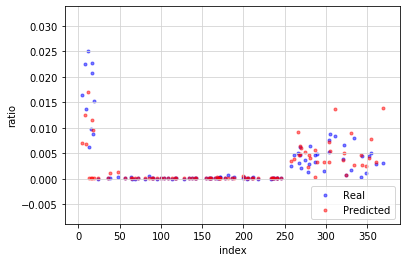

In [8]:
# Define x axis
x_axis = X_test.index

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('index')
plt.ylabel('ratio')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [9]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared scores:', r2)

Mean Absolute Error: 0.0019305854967603888
Mean Squared Error: 1.6701989529911056e-05
R-squared scores: 0.4245555342754491


## USE CV TO FIND BEST HYPERPARAMETERS TO MINIMIZE OVERFITTING

In [10]:
print(regr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


In [11]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
    'max_depth': [15, 30, 40],
    'n_estimators': [50, 100, 500, 600, 900]
}
gridforest = GridSearchCV(regr, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train.values.ravel())
gridforest.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.9s finished


{'max_depth': 30, 'n_estimators': 100}

In [22]:
for key, value in gridforest.best_params_.items():
        print(key, value)

max_depth 30
n_estimators 100


In [23]:
gridforest.best_params_['max_depth']

30